# human alpha

The cluster number to which each data belongs： [ 4 21 54 21 30 41 30 26 41 51  1 21 41  3 42 34 62 62 70 18 18 22 31  2
 70  4 21  4  1  4 20 73  4 34 11 26 34 30  0 30  1 62 62 62  2  9 62 62
 62 62 62 30 62 24 62 42 62  1 30  3 42 24 42 42 42 42 30 42 42 42 42 42
 42 42 42 42 42 42 42 42 42 42 42 67 38 30 42  7 42 57 42 42 42 42 42 51
 48 30 42 53  2 51 19 41 25 67 34 12 22 30 15 15  9  2 41 21 56 30 10 15
 15 15 15 15 15 15 67 67 36 62 62 56 62  9 34 34 34 34 34 13 34 34  7  7
  7  7  7  7 25 67 32  2  2 32  2  2  2 46 14 14 14 14 14 14 14 14 46 14
 14 14 36 41 38 37 68 33 33 33 71 21 18 18 18 18 18 18 11 18 28 12 12 64
  3  3  3  3 42 66 42 42 42 50 29 29 49 29 48 30 30 30 30 23 23 19 19 24
 24 44  4 53  4  4  4  4  4 54 12 10 15 22  9 68  0 34 30 34  7  7 27 25
 32  2  2 46 14 14 41 41  8  5 18 11 12 12 12 28 46  3 31 42 42 26 50 50
 50 50 48 30 74 23 19 24 59 30 30 30 30 30 30 30 30 30 30 30 30 30 11 15
 12 68 14 21 13 68 21 68  7  3 21 34 68 21 21 68 21 68 41 41 12 30 62 11
 11 

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


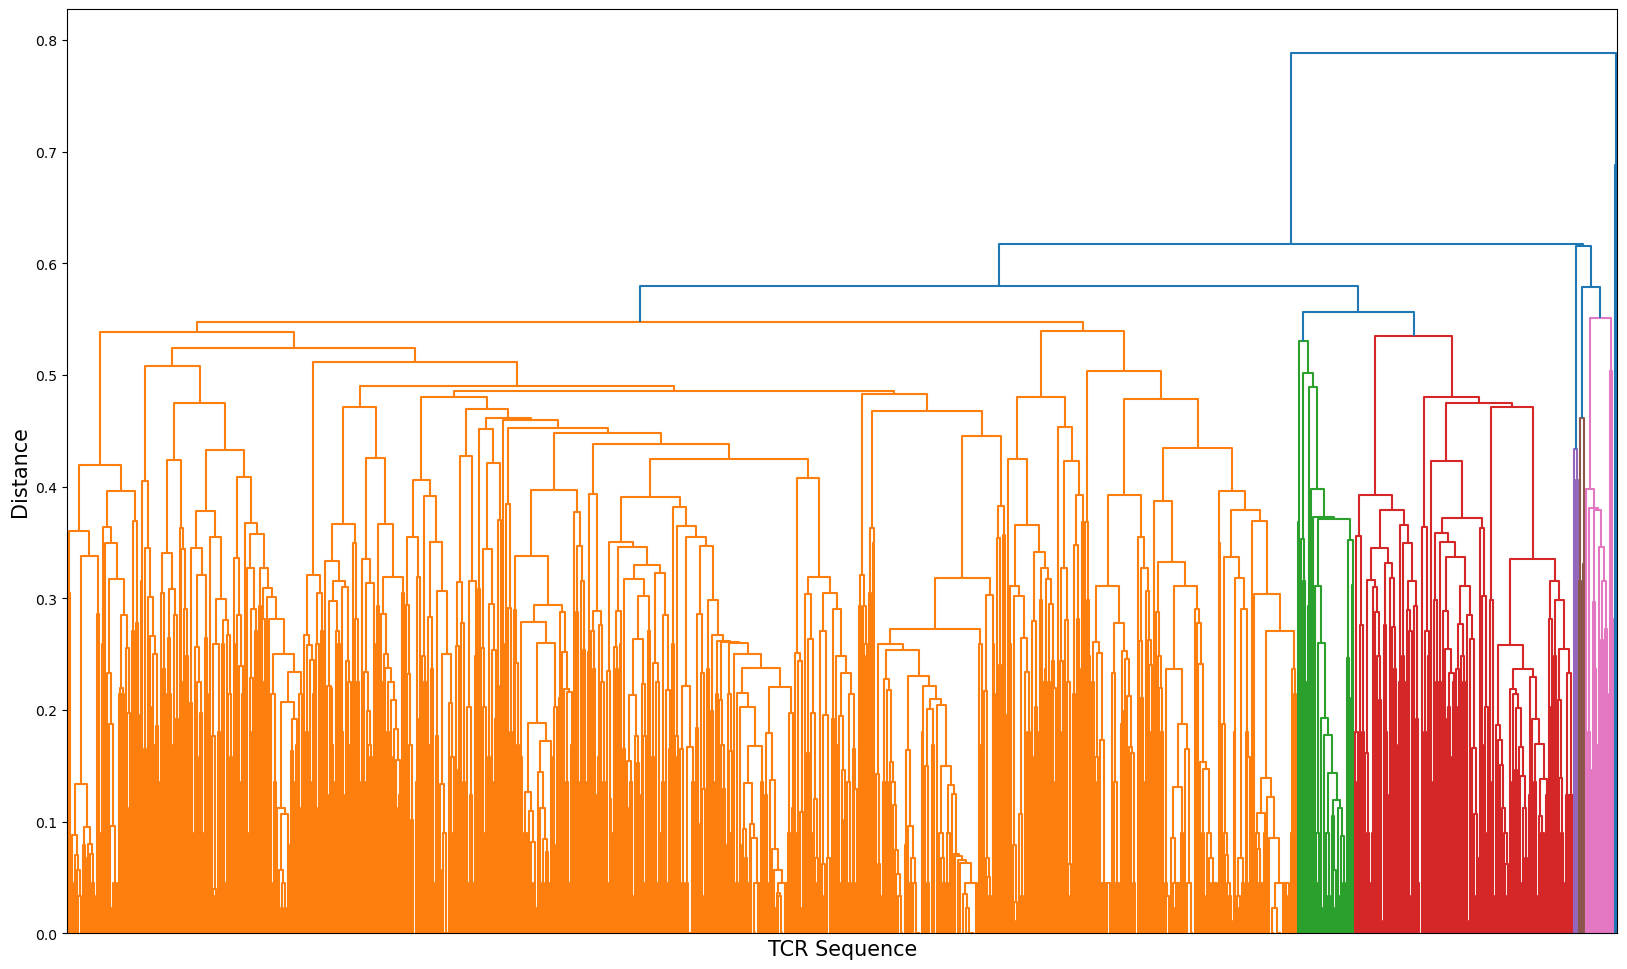

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


# Clustering based on precomputed distance matrix
distance_matrix = np.load('alpha_distance_human_matrix.npy')
#data = pd.read_csv("human_alpha.csv")
#epitope = data['epitope']

model = AgglomerativeClustering(n_clusters=75, affinity='precomputed', linkage='average')
clustering = model.fit(distance_matrix)

print("The cluster number to which each data belongs：", clustering.labels_)
print("members of each cluster：", clustering.children_)

# Adjust the shape of the distance matrix
adjust_distance_matrix = dist.squareform(distance_matrix)


# Use average linkage as a clustering method
Z = linkage(adjust_distance_matrix, 'average')
print("clustering process：", Z)

# Represent hierarchical clustering results as a dendrogram
fig = plt.figure(figsize=(20, 12))
dn = dendrogram(Z, no_labels=True)
plt.xlabel("TCR Sequence", fontsize=15)  
plt.ylabel("Distance", fontsize=15)  
plt.show()






In [2]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


data = pd.read_csv("human_alpha.csv")
epitope = data['epitope']
true_labels = epitope
cluster_labels = clustering.labels_

# Calculate ARI
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print("ARI:", ari_score)

# Calculate NMI
nmi_score = normalized_mutual_info_score(true_labels, cluster_labels)
print("NMI:", nmi_score)


ARI: 0.08245628851093169
NMI: 0.3263759371849147


In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import numpy as np
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

ari_scores = []
distance_matrix = np.load('alpha_distance_human_matrix.npy')
data = pd.read_csv("human_alpha.csv")
epitope = data['epitope']
true_labels = epitope
# Loop through trying different numbers of clusters
for num_clusters in range(1, 100):
    # Use the current number of clusters for clustering
    model = AgglomerativeClustering(n_clusters=num_clusters, affinity='precomputed', linkage='average')
    clustering = model.fit(distance_matrix)
    cluster_labels = clustering.labels_
    
    # Calculate the ARI value under the current number of clusters
    ari_score = adjusted_rand_score(true_labels, cluster_labels)
    ari_scores.append(ari_score)

# Find the number of clusters with the largest ARI value
best_num_clusters = np.argmax(ari_scores) + 1
best_ari_score = max(ari_scores)

print("Best number of clusters:", best_num_clusters)
print("Best ARI score:", best_ari_score)


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglo

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglo

Best number of clusters: 75
Best ARI score: 0.08245628851093169


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglo

# human beta

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The cluster number to which each data belongs： [37 37 37 ... 71 29 36]
members of each cluster： [[2300 2406]
 [2263 2264]
 [ 659 2424]
 ...
 [5026 5027]
 [  43 4954]
 [5028 5029]]
clustering process： [[2.30000000e+03 2.40600000e+03 0.00000000e+00 2.00000000e+00]
 [2.26300000e+03 2.26400000e+03 0.00000000e+00 2.00000000e+00]
 [6.59000000e+02 2.42400000e+03 0.00000000e+00 2.00000000e+00]
 ...
 [5.02600000e+03 5.02700000e+03 7.46092023e-01 2.51300000e+03]
 [4.30000000e+01 4.95400000e+03 7.56756757e-01 3.00000000e+00]
 [5.02800000e+03 5.02900000e+03 7.92423542e-01 2.51600000e+03]]


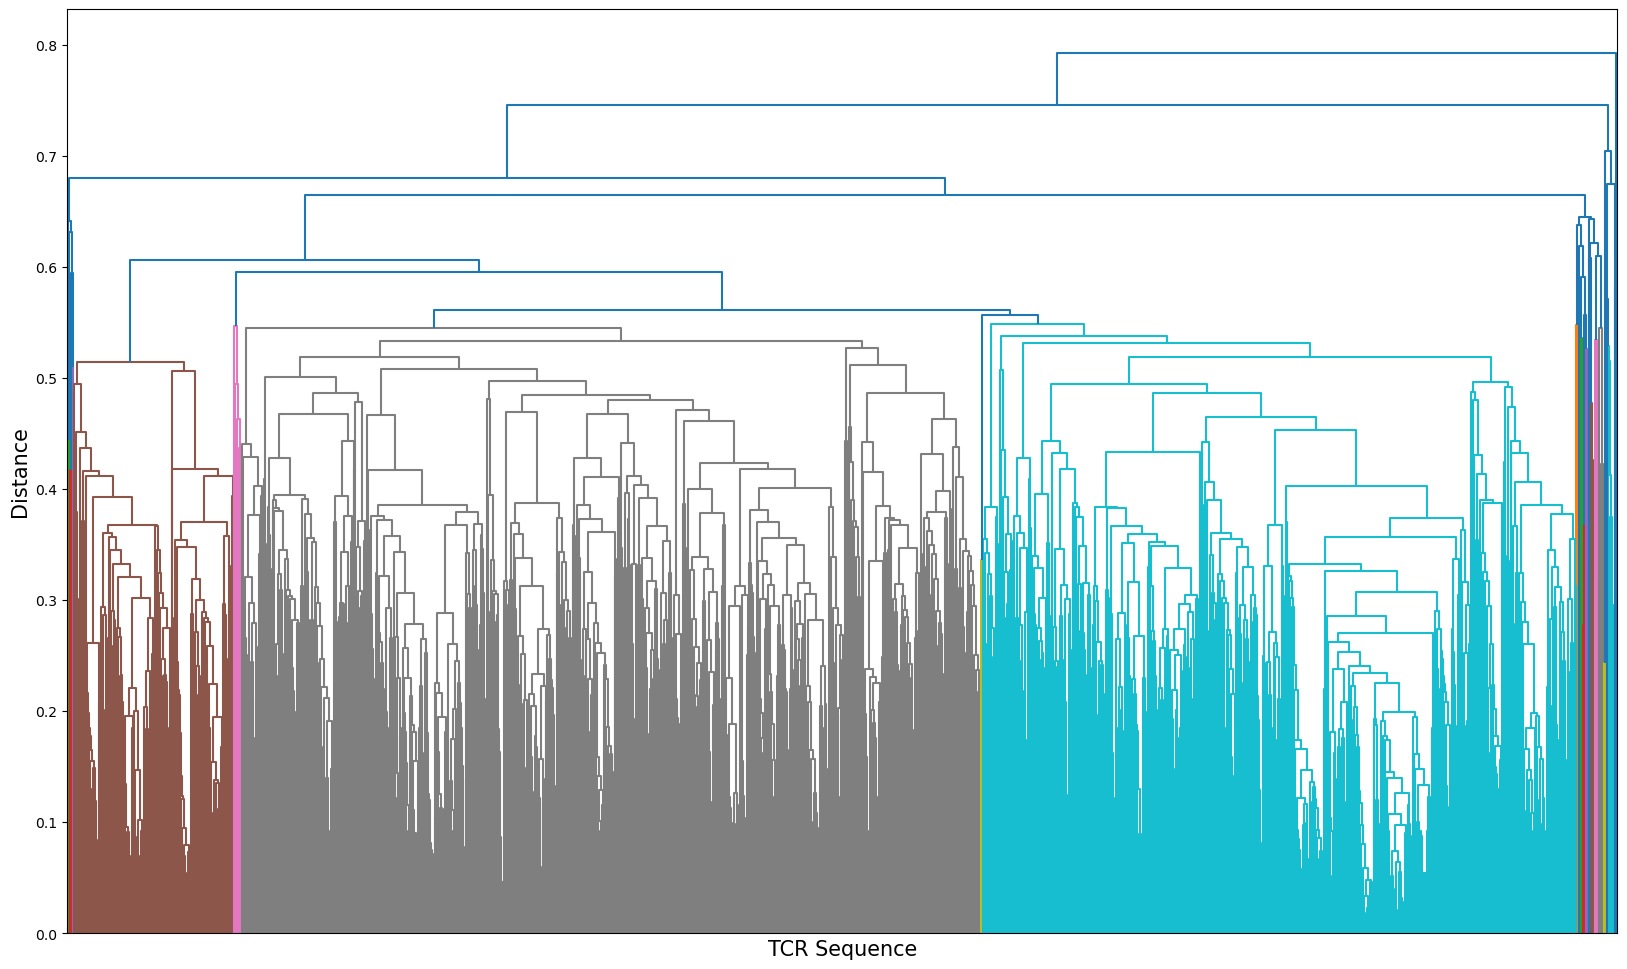

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage

# Clustering based on precomputed distance matrix
distance_matrix = np.load('beta_distance_human_matrix.npy')
model = AgglomerativeClustering(n_clusters=92, affinity='precomputed', linkage='average')
clustering = model.fit(distance_matrix)

print("The cluster number to which each data belongs：", clustering.labels_)
print("members of each cluster：", clustering.children_)

# Adjust the shape of the distance matrix
adjust_distance_matrix = dist.squareform(distance_matrix)


# Use average linkage as a clustering method
Z = linkage(adjust_distance_matrix, 'average')
print("clustering process：", Z)

# Represent hierarchical clustering results as a dendrogram
fig = plt.figure(figsize=(20, 12))
dn = dendrogram(Z, no_labels=True)
plt.xlabel("TCR Sequence", fontsize=15)  
plt.ylabel("Distance", fontsize=15)  
plt.show()


In [5]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

data = pd.read_csv("human_beta.csv")
epitope = data['epitope']
true_labels = epitope
cluster_labels = clustering.labels_

# calculate ARI
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print("ARI:", ari_score)

# calculate NMI
nmi_score = normalized_mutual_info_score(true_labels, cluster_labels)
print("NMI:", nmi_score)


ARI: 0.10689293820703895
NMI: 0.2647203474198246


# human combined

The cluster number to which each data belongs： [11 14 14  5 12 61 12 20 12 12  5 66 62 12 14  5 14 30 12 12 62 30 12  1
 39 14 30 25 30 30 62 34 61 30 30 30 30 30 30 30 30 30 30 30 30 30 30 30
 33 30 30 30 30 17 27 25  2  5  8  5 14 39 14 61 11 61  4  4 12  2  5  8
 13 61  4  4 61  4  4  4  4  4 65  5 12 12 12 13 12 39 14  3  3 39  1  3
  8 61 18 68 14 35 32 32 76 65 19  2 19  2 77  2  2  1 10 10 62 23 10 10
 10 10 20 10 10 10  7  5  5 20 39 20 44 28 44 15 14 13 61 30 13 31 70 16
  5 13  5 58 28 58  7 28 14 14 62 30 42 20 30 30 21 36 16 60 60 52 61  1
 61  1 49  1 53 34 67  6  9  6  6  1 33 62 62  6 73 58 35 70  4 38 12 42
 39 31 31 28 17 17 47 19  2  2  1 10 10  5 25 22 44 61  5  5 58 58  9 58
  1 39 37  9 72 62 62 44 14 44 24 61 61 31 11 49 59 29 36 14 14 14 14 14
 14 14 32 14 14 14 14 62 14 14 14 14 14 14 14 14 14  5  5  5 66 58 61 12
  5  5 39 39 39 39 27 39  5  5 40 69  5  5  5  5  5 66  5 58  2 14 58 58
  5  5  5 71  5 71 58  8 27 27 27 27  5  5  5 58  0  6 11 23  5 61 61 61
 61 

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


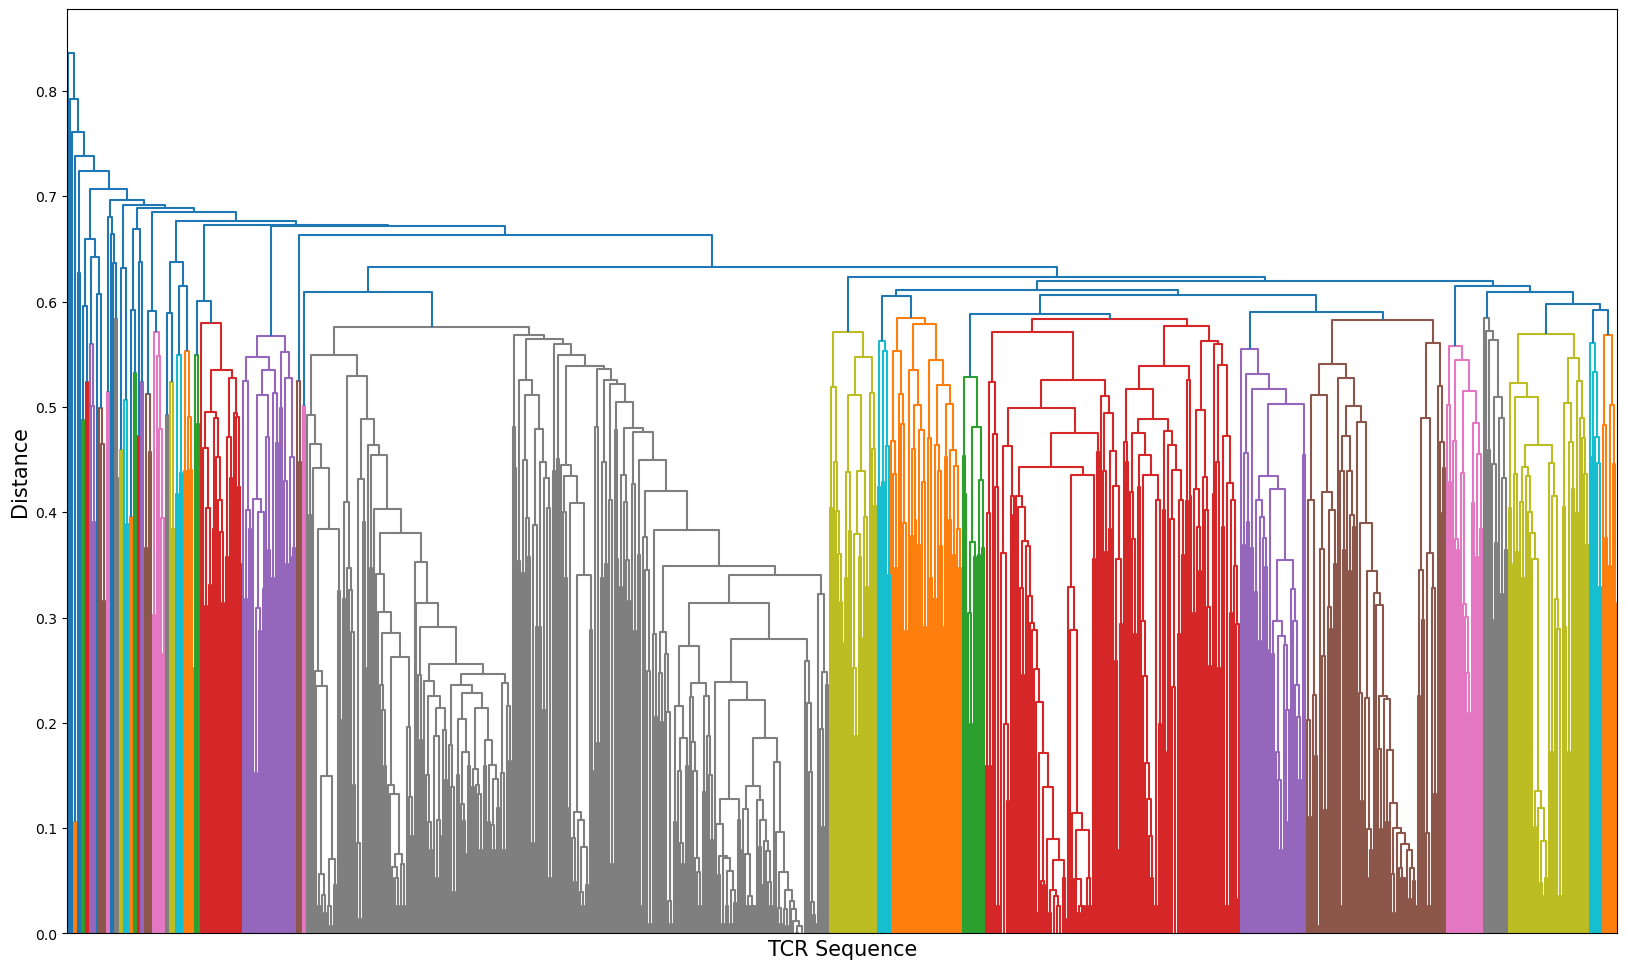

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage

# Clustering based on precomputed distance matrix
distance_matrix = np.load('combined_distances_human_matrix.npy')
model = AgglomerativeClustering(n_clusters=81, affinity='precomputed', linkage='average')
clustering = model.fit(distance_matrix)

print("The cluster number to which each data belongs：", clustering.labels_)
print("members of each cluster：", clustering.children_)

# Adjust the shape of the distance matrix
adjust_distance_matrix = dist.squareform(distance_matrix)


# Use average linkage as a clustering method
Z = linkage(adjust_distance_matrix, 'average')
print("clustering process：", Z)

# Represent hierarchical clustering results as a dendrogram
fig = plt.figure(figsize=(20, 12))
dn = dendrogram(Z, no_labels=True)
plt.xlabel("TCR Sequence", fontsize=15)  
plt.ylabel("Distance", fontsize=15)  
plt.show()


In [7]:
 from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

data = pd.read_csv("human_combined.csv")
epitope = data['epitope']
true_labels = epitope
cluster_labels = clustering.labels_

# calculate ARI
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print("ARI:", ari_score)

# calculate NMI
nmi_score = normalized_mutual_info_score(true_labels, cluster_labels)
print("NMI:", nmi_score)


ARI: 0.25122367319697697
NMI: 0.41443309394096284


# mouse alpha

The cluster number to which each data belongs： [43  9  9 14 16 36 17  9 16 42 24 24 24  5  9  4  9  9 17 12 42 12 30 30
 44 42 17 15 15 12 17  9  9 17 30 16  9 12 17 30 33 42  3 34 17 42 16 42
 17 42 30 17 30 17 30 42 17 34 17 30 17 26 42 42 42 12 12 17 30 17 30 31
 12 17 12 30 30 12 30  9 17 12 17 12 30 42 42  3 30 42 30 44 17 30 30 12
 30 42  9 42 42 42 17 12 12 17 12 30 11  3 17 34 34  9 12 17 30 30 44 12
 17 12 17 34  9 12 42 12  9 42 42 42  4  9  3 30 30 12  4 20 14 18 18  9
 42 40  1  0  7  7 19 19 19 19  7 28  6  7  7  7 13  7  7 13  7  7  7  7
 22  7  7  7  7  7  7  7  7 13  7  7  7  7  7  7 19  7  7 28 28  7  7  7
  7  7  7 20 20  0 14  0 19  6  1 37 20 29 29 20  6 20 37  6  6 29 29 20
  6  7 13 20 29  6  6 20 20  6 20 13 11 20 20  6  7 20  6  6  0  6  6 22
 22  6  6 22 22  0  0 13 25  6  6  6  6 19  6 20 20 20  7  7  7 19 19 19
 20 19 19  7  8  8  8  8 39  8  0  1 19 14  1  1  1  1  1  1  1  1  1 19
  2  1  1  5  1  1  1  1 19  1  1 32  1  1  1  1  1  1  1  1  1  1  1  1
  1 

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


clustering process： [[1.60000000e+01 1.70000000e+01 0.00000000e+00 2.00000000e+00]
 [5.15000000e+02 5.20000000e+02 0.00000000e+00 2.00000000e+00]
 [9.00000000e+00 3.99000000e+02 0.00000000e+00 2.00000000e+00]
 ...
 [1.16200000e+03 1.16300000e+03 6.78895486e-01 5.77000000e+02]
 [1.14800000e+03 1.16400000e+03 6.98928628e-01 5.83000000e+02]
 [7.10000000e+01 1.16500000e+03 7.10502105e-01 5.84000000e+02]]


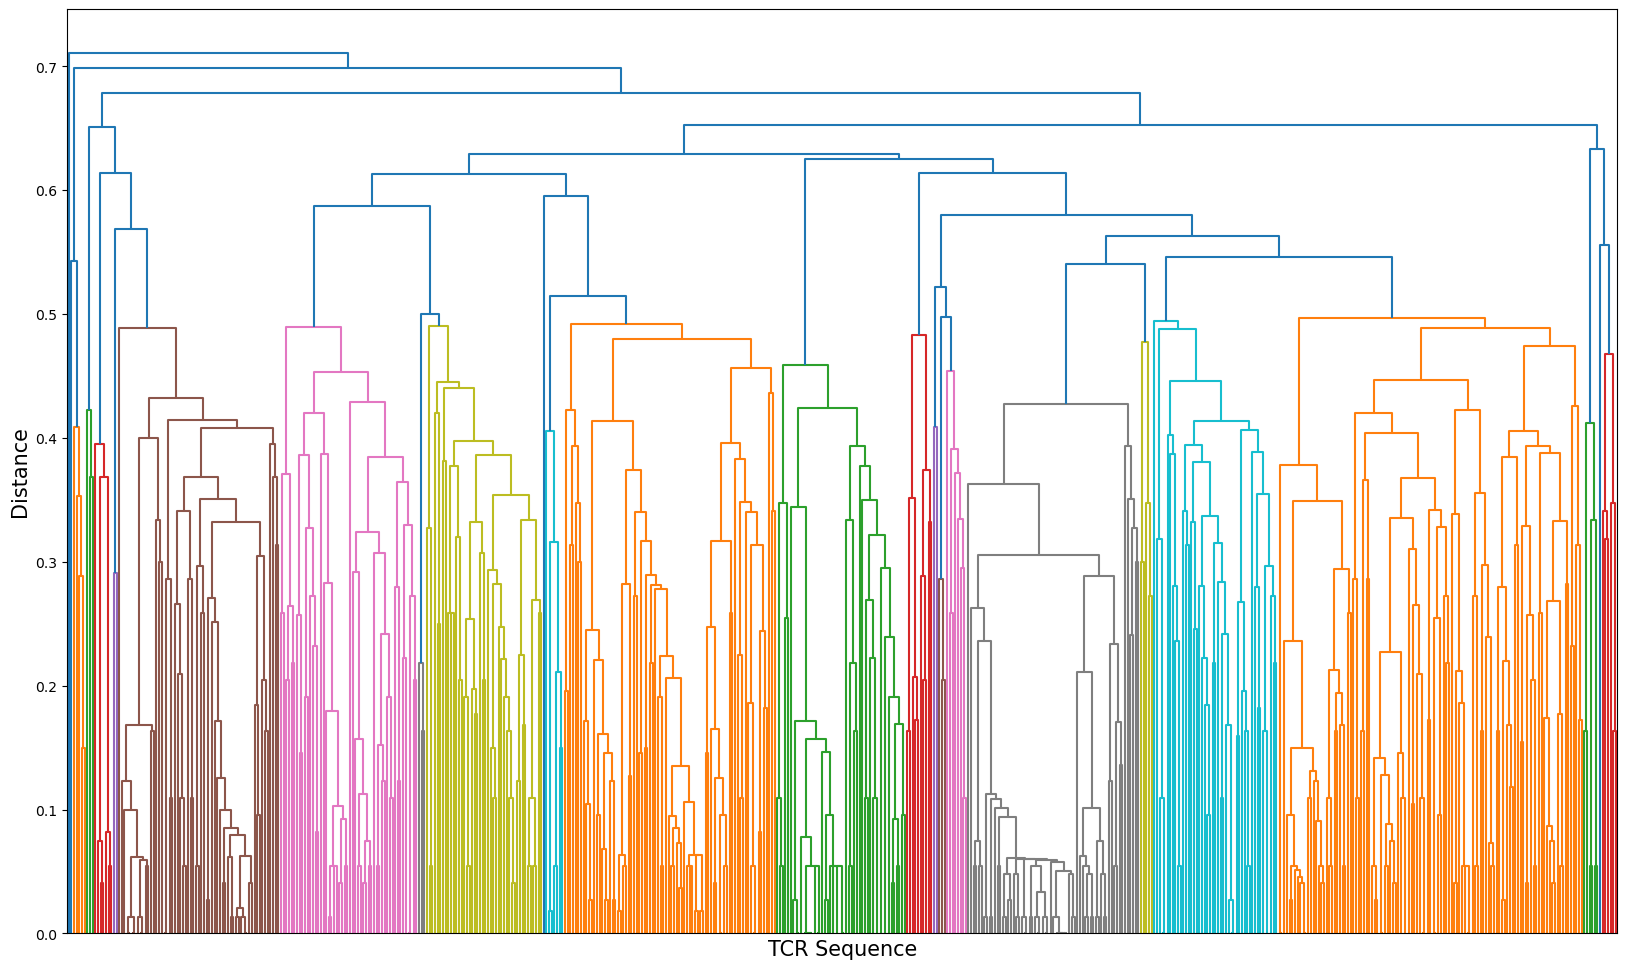

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage

# Clustering based on precomputed distance matrix
distance_matrix = np.load('alpha_distance_mouse_matrix.npy')
model = AgglomerativeClustering(n_clusters=45, affinity='precomputed', linkage='average')
clustering = model.fit(distance_matrix)

print("The cluster number to which each data belongs：", clustering.labels_)
print("members of each cluster：", clustering.children_)

# Adjust the shape of the distance matrix
adjust_distance_matrix = dist.squareform(distance_matrix)


# Use average linkage as a clustering method
Z = linkage(adjust_distance_matrix, 'average')
print("clustering process：", Z)

# Represent hierarchical clustering results as a dendrogram
fig = plt.figure(figsize=(20, 12))
dn = dendrogram(Z, no_labels=True)
plt.xlabel("TCR Sequence", fontsize=15)  
plt.ylabel("Distance", fontsize=15)  
plt.show()



In [9]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


data = pd.read_csv("mouse_alpha.csv")
epitope = data['epitope']
true_labels = epitope
cluster_labels = clustering.labels_

# Calculate ARI
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print("ARI:", ari_score)

# Calculate NMI
nmi_score = normalized_mutual_info_score(true_labels, cluster_labels)
print("NMI:", nmi_score)

ARI: 0.1424671439961457
NMI: 0.2691768890566748


# mouse beta

The cluster number to which each data belongs： [ 2  3  3 15 13 17 11 37 17  3  9  9 17 17  4 17 17  4 17 30 17 17  8 37
 17 17 28 16  3 28 28 28 34 28 10 28 24  0 11  8  1 21 16 11 11 24 28 28
 28  3 14 38 12  2  2 12 15  0 13  1  1 17 17  2  2  7 14  8 37  1  3 29
 29 32  1  2 12  9  8 17 17  8  8  8 12 21  8  1 12  8 12  1  2 11  1 14
 14  1 12 10 15  0 16 12 12 12  1 12  2 12 36 12  1 28 36 36 36  5 11  1
 14 13 15 17  1  3  8 36 14  1 15 21  2 12 12 12 12 24  4 15 12  2 17  4
  8 10  2  8  1 14  3 12 12 12  8  6 12 31 11  3  1 30  1  1  1  1  1  1
  1  8  2 12 18 29 10  8 12  1  2  1 38  1  9 15 12  2 17 17  2  2  2  3
 28  2  2 12  2 17 17 17 12  2  2  2  2  2  2 20 17  1  2  2  2 17 16 26
  2  2  2  2  2 24  2  2  2  2  2 12 37  9  4 11  1 29  8 14 33  1 17 12
  2 33 12 12 12  1 12 12 12 12  5 17 17 17 11 12 10  9 15 37  1 33  2 25
 33  9 12 32  8  1 39 10  8 21 21 12 12  1  3  2  2 12  1 16 15  2  2  2
  2  1  8  8  8 37  8  8  8 11  1 17  2  1 37  2  2  3  8  9  8  2  8 38
 11 

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


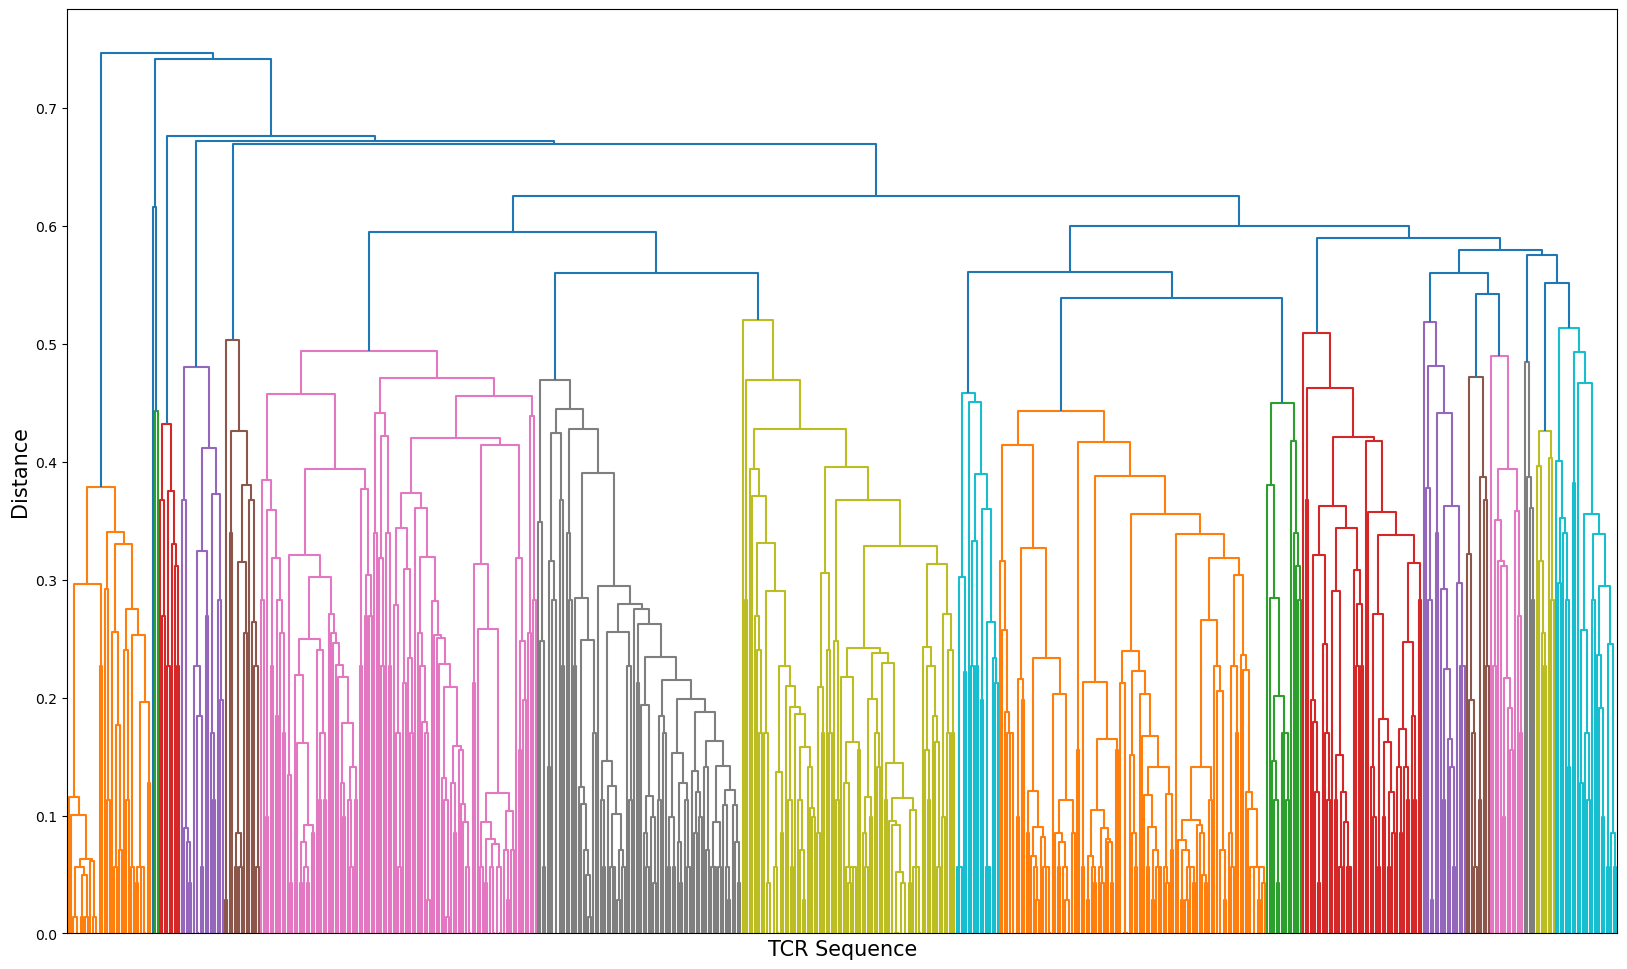

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage

# Clustering based on precomputed distance matrix
distance_matrix = np.load('beta_distance_mouse_matrix.npy')
model = AgglomerativeClustering(n_clusters=40, affinity='precomputed', linkage='average')
clustering = model.fit(distance_matrix)

print("The cluster number to which each data belongs：", clustering.labels_)
print("members of each cluster：", clustering.children_)

# Adjust the shape of the distance matrix
adjust_distance_matrix = dist.squareform(distance_matrix)


# Use average linkage as a clustering method
Z = linkage(adjust_distance_matrix, 'average')
print("clustering process：", Z)

# Represent hierarchical clustering results as a dendrogram
fig = plt.figure(figsize=(20, 12))
dn = dendrogram(Z, no_labels=True)
plt.xlabel("TCR Sequence", fontsize=15)  
plt.ylabel("Distance", fontsize=15)  
plt.show()


In [11]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score


data = pd.read_csv("mouse_beta.csv")
epitope = data['epitope']
true_labels = epitope
cluster_labels = clustering.labels_

# Calculate ARI
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print("ARI:", ari_score)

# Calculate NMI
nmi_score = normalized_mutual_info_score(true_labels, cluster_labels)
print("NMI:", nmi_score)

ARI: 0.23293646964089407
NMI: 0.36261981012026967


# mouse combined

The cluster number to which each data belongs： [46 18 18 30  1  4  4 30  0 46 46 58 31 18 10 10  4  4  4 25 53  3  4  7
  3 50 29 29 51 51 51  0  4 29 25 46 24  3  4  4  3  3 19  0 39  3 10  0
  3  0 47 29 51 25 15 18  7  7 29 18 21 47 10 18  0  0  0 29  4  4 18 46
  0 46  1 53 10  4 14 14 14 14 15 10 18 18 53  4 29 29 50 29  1  7 29  3
  7 46 46 46 46 46  4  7  1 18 50  0 46  4  4  4  4  4  4 33  3 39 25  3
  3 29 29  4  1 29 46 46 46 46 46  3  4 23  4  0 23 18 18  4 29  4 10 29
 29 29 29 29 29  4 10 18 39  0 14 51 10 16  0 10 25 29 29 29 24 19  9 46
  4  4  4  4 46 46 46 28 57 51 46 46  5 46  4  4  4  4  5 46 46 46 46 22
 46  4 38 24 46 46 46 46  4  4 40 16 40 10 46 46 46 46  4 22  4 46 46 11
 11 29 46 46 46 46 46 16 16 16  9 48 28 27  3 35 22 16  4  0 16 46 22  5
  5  5  5 46 46 46 46 26 26 46  4  4  4 13  2 26  4 32 32 22 22 32 22 27
  2  2  4  3 10  4 16  3  4  9 46 46 29 29 46 46  4  4  9 28 13 49 46 46
 46 46  5  4  3  3 16  4  4 16 16 16 16 16 16  4  4 46  4  4  5 16 46 46
 46 

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


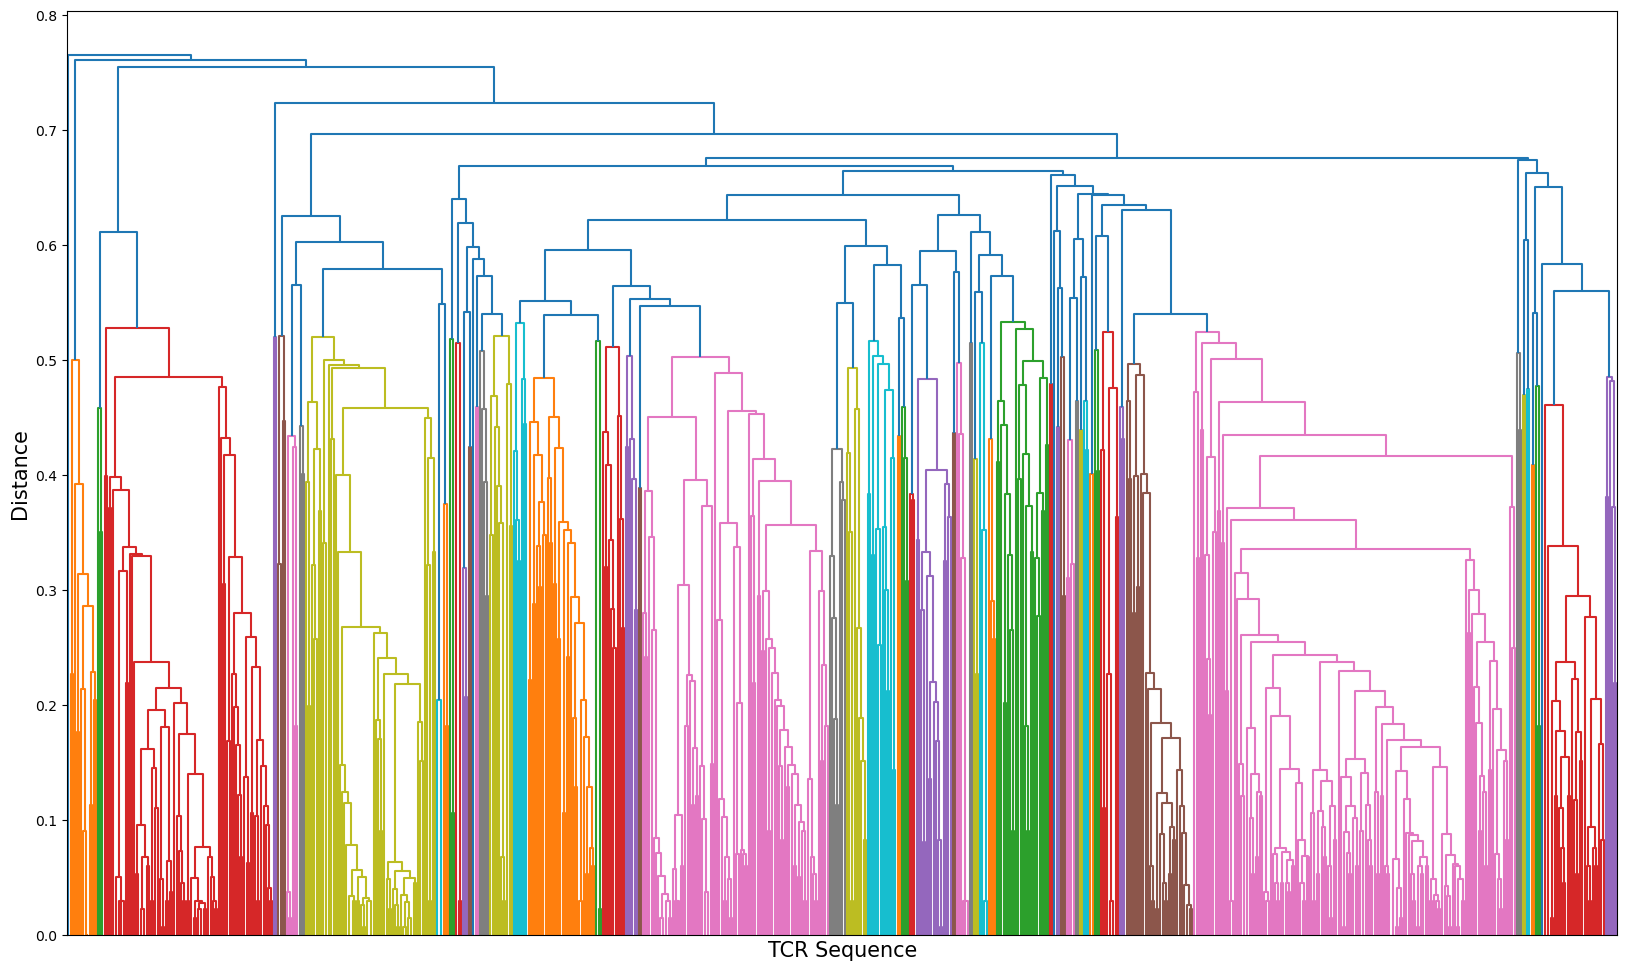

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.pairwise import euclidean_distances
import scipy.spatial.distance as dist
from scipy.cluster.hierarchy import dendrogram, linkage

# Clustering based on precomputed distance matrix
distance_matrix = np.load('combined_distances_mouse_matrix.npy')
model = AgglomerativeClustering(n_clusters=60, affinity='precomputed', linkage='average')
clustering = model.fit(distance_matrix)

print("The cluster number to which each data belongs：", clustering.labels_)
print("members of each cluster：", clustering.children_)

# Adjust the shape of the distance matrix
adjust_distance_matrix = dist.squareform(distance_matrix)


# Use average linkage as a clustering method
Z = linkage(adjust_distance_matrix, 'average')
print("clustering process：", Z)

# Represent hierarchical clustering results as a dendrogram
fig = plt.figure(figsize=(20, 12))
dn = dendrogram(Z, no_labels=True)
plt.xlabel("TCR Sequence", fontsize=15)  
plt.ylabel("Distance", fontsize=15)  
plt.show()


In [13]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

data = pd.read_csv("mouse_combined.csv")
epitope = data['epitope']
true_labels = epitope
cluster_labels = clustering.labels_

# Calculate ARI
ari_score = adjusted_rand_score(true_labels, cluster_labels)
print("ARI:", ari_score)

# Calculate NMI
nmi_score = normalized_mutual_info_score(true_labels, cluster_labels)
print("NMI:", nmi_score)

ARI: 0.469136513633606
NMI: 0.533629669740254
